LDA

In [22]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [46]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_green_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [5]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data = data[['sepal length (cm)', 'sepal width (cm)']]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1,
       0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1])

In [49]:
y_test

array([1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7105263157894737

получили не очень высокую точность предсказания

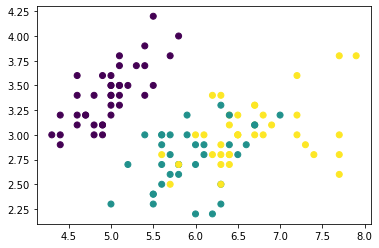

In [17]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

один класс хорошо предсказался (который = 0), 2 другие как-то не очень (= 1 и = 2, все ошибки как раз там)

In [18]:
lda.means_

array([[4.97692308, 3.40769231],
       [5.94285714, 2.76571429],
       [6.66842105, 3.02105263]])

<ipython-input-47-747ad0f16477>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_green_classes',


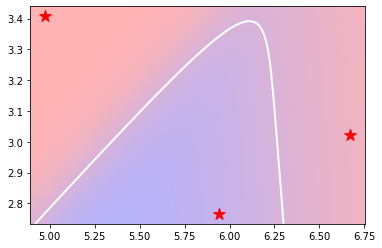

In [47]:
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_green_classes',
                    norm=colors.Normalize(0., 1.), zorder=-1)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [48]:
lda.coef_

array([[-6.46592428,  8.38825219],
       [ 1.85798104, -4.69502523],
       [ 4.92478185, -4.28463033]])

для класса, который лучше всех определился, и значения наших признаков выше

кластеризация kmeans

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

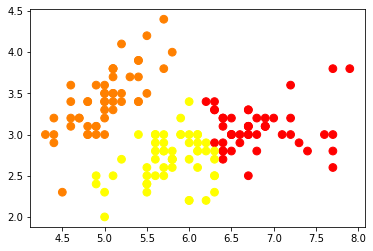

In [53]:
plt.scatter(data[['sepal length (cm)']], data['sepal width (cm)'], cmap='autumn', c=clusters, s=60)

посмотрели, как отрабатывает kmeans на 3х кластерах; подберем оптимальное количество кластеров:

In [54]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


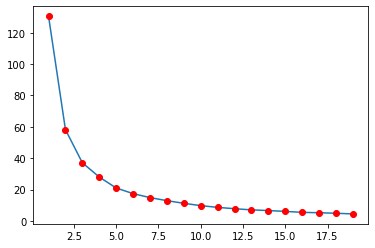

In [55]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

очевидно, что имеет смысл делить данные на 2 или 3 кластера; посмотрим, что получится с 2мя кластерами:

In [68]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data)

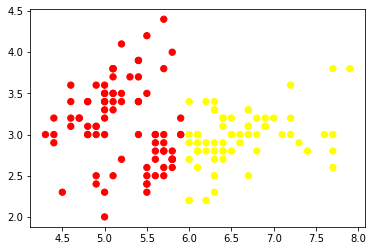

In [69]:
plt.scatter(data[['sepal length (cm)']], data['sepal width (cm)'], cmap='autumn', c=clusters, s=40)